In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

#uploading the csv

churn = pd.read_csv(r'C:\Users\abram\Downloads\churn_clean.csv')
print(churn.head())

   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

In [1]:
churn.drop(['CaseOrder','Customer_id','Interaction', 'UID'], axis=1, inplace = True)

NameError: name 'churn' is not defined

In [3]:
churn['Churn'].describe()

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

In [4]:
churn['StreamingMovies'].describe()

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object

In [5]:
churn['StreamingTV'].describe()

count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object

In [6]:
churn['Multiple'].describe()

count     10000
unique        2
top          No
freq       5392
Name: Multiple, dtype: object

In [7]:
churn['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [8]:
churn['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [9]:
churn['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [10]:
churn['Contract'].describe()

count              10000
unique                 3
top       Month-to-month
freq                5456
Name: Contract, dtype: object

In [11]:
#Importing One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

#Transforming the categorical variables to type category
churn['City'] = churn['City'].astype('category')
churn['Area'] = churn['Area'].astype('category')
churn['TimeZone'] = churn['TimeZone'].astype('category')
churn['Job'] = churn['Job'].astype('category')
churn['State'] = churn['State'].astype('category')
churn['Gender'] = churn['Gender'].astype('category')
churn['Marital'] = churn['Marital'].astype('category')
churn['Port_modem'] = churn['Port_modem'].astype('category')
churn['Tablet'] = churn['Tablet'].astype('category')
churn['Techie'] = churn['Techie'].astype('category')
churn['Contract'] = churn['Contract'].astype('category')
churn['InternetService'] = churn['InternetService'].astype('category')
churn['Phone'] = churn['Phone'].astype('category')
churn['Multiple'] = churn['Multiple'].astype('category')
churn['TechSupport'] = churn['TechSupport'].astype('category')
churn['County'] = churn['County'].astype('category')
churn['Zip'] = churn['Zip'].astype('category')
churn['Marital'] = churn['Marital'].astype('category')
churn['OnlineSecurity'] = churn['OnlineSecurity'].astype('category')
churn['OnlineBackup'] = churn['OnlineBackup'].astype('category')
churn['DeviceProtection'] = churn['DeviceProtection'].astype('category')
churn['StreamingTV'] = churn['StreamingTV'].astype('category')
churn['StreamingMovies'] = churn['StreamingMovies'].astype('category')
churn['PaperlessBilling'] = churn['PaperlessBilling'].astype('category')
churn['PaymentMethod'] = churn['PaymentMethod'].astype('category')
churn['Item1'] = churn['Item1'].astype('category')
churn['Item2'] = churn['Item2'].astype('category')
churn['Item3'] = churn['Item3'].astype('category')
churn['Item4'] = churn['Item4'].astype('category')
churn['Item5'] = churn['Item5'].astype('category')
churn['Item6'] = churn['Item6'].astype('category')
churn['Item7'] = churn['Item7'].astype('category')
churn['Item8'] = churn['Item8'].astype('category')
churn['Churn'] = churn['Churn'].astype('category')

#Storing variables as numerical category codes
churn['City_cat'] = churn['City'].cat.codes
churn['Area_cat'] = churn['Area'].cat.codes
churn['TZ_cat'] = churn['TimeZone'].cat.codes
churn['Job_cat'] = churn['Job'].cat.codes
churn['State_cat'] = churn['State'].cat.codes
churn['Gender_cat'] = churn['Gender'].cat.codes
churn['Techie01'] = churn['Techie'].cat.codes
churn['Contract_cat'] = churn['Contract'].cat.codes
churn['InternetService_cat'] = churn['InternetService'].cat.codes
churn['Multiple01'] = churn['Multiple'].cat.codes

churn['County_cat'] = churn['County'].cat.codes
churn['Zip_cat'] = churn['Zip'].cat.codes
churn['Marital_cat'] = churn['Marital'].cat.codes
churn['Modem'] = churn['Port_modem'].cat.codes
churn['Tablet01'] = churn['Tablet'].cat.codes
churn['Phone01'] = churn['Phone'].cat.codes
churn['DP'] = churn['DeviceProtection'].cat.codes
churn['STV'] = churn['StreamingTV'].cat.codes
churn['SMov'] = churn['StreamingMovies'].cat.codes
churn['PB'] = churn['PaperlessBilling'].cat.codes
churn['PM'] = churn['PaymentMethod'].cat.codes
churn['OB'] = churn['OnlineBackup'].cat.codes
churn['OS'] = churn['OnlineSecurity'].cat.codes
churn['TS'] = churn['TechSupport'].cat.codes
churn['1'] = churn['Item1'].cat.codes
churn['2'] = churn['Item2'].cat.codes
churn['3'] = churn['Item3'].cat.codes
churn['4'] = churn['Item4'].cat.codes
churn['5'] = churn['Item5'].cat.codes
churn['6'] = churn['Item6'].cat.codes
churn['7'] = churn['Item7'].cat.codes
churn['8'] = churn['Item8'].cat.codes
churn['Churn01'] = churn['Churn'].cat.codes


# Create an instance of One hot encoder
enc = OneHotEncoder()
  
# Passing encoded columns through One hot encoder
  
churn_enc = pd.DataFrame(enc.fit_transform(
    churn[['State_cat', 'Gender_cat','Techie01','Contract_cat','InternetService_cat', 'Multiple01',
         'City_cat', 'Area_cat', 'TZ_cat', 'Job_cat', 'Zip_cat', 'Marital_cat', 'Modem',
          'Tablet01', 'Phone01', 'DP', 'STV', 'SMov', 'PB', 'PM', 'OB', 'OS', 'TS','1','2','3','4','5','6',
          '7', '8','Churn01']]).toarray())
  
# Merge with main
churn_updated= churn.join(churn_enc)

churn.drop(['City', 'State', 'County', 'Zip', 'Area', 'TimeZone', 'Job','Marital','Gender', 'Churn', 
            'Techie', 'Contract', 'Port_modem',
           'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity','OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
           'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'],axis=1, inplace=True)

  
print(churn)

           Lat        Lng  Population  Children  Age    Income  \
0     56.25100 -133.37571          38         0   68  28561.99   
1     44.32893  -84.24080       10446         1   27  21704.77   
2     45.35589 -123.24657        3735         4   50   9609.57   
3     32.96687 -117.24798       13863         1   48  18925.23   
4     29.38012  -95.80673       11352         0   83  40074.19   
...        ...        ...         ...       ...  ...       ...   
9995  43.43391  -72.78734         640         3   23  55723.74   
9996  36.56907  -87.41694       77168         4   48  34129.34   
9997  35.52039 -100.44180         406         1   48  45983.43   
9998  33.58016  -85.13241       35575         1   39  16667.58   
9999  34.70783  -83.53648       12230         1   28   9020.92   

      Outage_sec_perweek  Email  Contacts  Yearly_equip_failure  ...  TS  1  \
0               7.978323     10         0                     1  ...   0  4   
1              11.699080     12         0        

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,City_cat,Area_cat,TZ_cat,Job_cat,State_cat,Gender_cat,Techie01,Contract_cat,InternetService_cat,Multiple01,County_cat,Zip_cat,Marital_cat,Modem,Tablet01,Phone01,DP,STV,SMov,PB,PM,OB,OS,TS,1,2,3,4,5,6,7,8,Churn01
Lat,1.000000,-0.100639,-0.220598,-0.000452,-0.002943,0.006563,0.004827,-0.030042,-0.002213,-0.007125,-0.015743,0.001406,-0.016949,0.020470,0.010734,-0.062556,-0.005806,0.111427,-0.018062,0.009987,-0.008518,0.022667,-0.006479,0.035373,-0.050168,-0.011052,-0.019988,0.001608,-0.005639,0.017594,0.017822,-0.000064,0.020627,-0.012681,-0.013009,-0.005409,-0.009164,0.005793,0.005380,-0.003421,0.011015,-0.000464,-0.008726,0.006087,-0.019583,0.009387
Lng,-0.100639,1.000000,-0.048294,0.013634,0.012117,-0.002997,0.005646,0.007872,0.008118,-0.005577,0.003618,0.011765,0.003446,-0.024748,-0.007889,0.304050,0.008581,0.242691,0.013443,-0.001746,0.010609,-0.000323,-0.007049,-0.045176,-0.888841,0.016088,-0.003269,0.018904,-0.006163,0.021181,-0.008576,0.010398,0.002424,-0.010692,0.015037,0.003072,-0.009469,0.024389,0.003024,0.014966,-0.002398,0.001366,-0.008770,0.001601,0.001912,-0.004603
Population,-0.220598,-0.048294,1.000000,-0.005877,0.010538,-0.008639,0.005483,0.017962,0.004019,-0.004483,-0.003559,-0.004778,-0.003902,-0.018429,-0.005373,0.139759,0.009747,-0.096055,-0.010659,-0.011483,0.013686,-0.006590,-0.001241,-0.007398,0.038886,-0.005016,0.008577,0.001225,0.008196,-0.003795,-0.006590,-0.005882,0.008656,-0.000579,0.010352,0.012549,-0.006606,0.000618,-0.002571,0.001620,-0.008272,0.006970,0.000834,-0.013062,0.008524,-0.008533
Children,-0.000452,0.013634,-0.005877,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.005091,-0.009781,0.025585,-0.019620,-0.007879,0.005933,-0.007239,-0.008031,0.006032,-0.006884,0.023639,0.006013,-0.021969,-0.005332,-0.016753,0.000045,0.011283,0.001494,-0.001629,0.005477,-0.007106,0.003461,0.006828,0.000818,-0.000297,0.006937,0.000878,0.011470,0.013146,0.003394,-0.016768,-0.000240,-0.000547,0.000687,-0.005236,-0.004264
Age,-0.002943,0.012117,0.010538,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.016979,0.010729,-0.014724,-0.003964,0.011745,0.009905,0.009304,-0.007680,-0.005660,-0.007531,-0.010071,0.005027,-0.004674,0.001291,-0.008526,-0.009721,0.006081,-0.004384,0.009521,0.014489,-0.000197,0.010125,0.002247,-0.024085,0.003309,-0.011213,0.017155,-0.005972,0.006659,-0.003778,0.012237,-0.008305,0.010635,0.005353,0.015193,0.005630
Income,0.006563,-0.002997,-0.008639,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,0.002114,-0.003014,0.003674,-0.007892,0.002557,-0.005384,0.013051,0.011632,-0.018436,0.005442,-0.002990,-0.012867,-0.000214,0.014326,0.002952,-0.005045,-0.014977,0.005999,-0.001677,0.014073,-0.003324,-0.002186,-0.012049,0.018082,-0.005974,-0.010385,0.008835,-0.004009,0.007718,-0.002707,-0.022750,0.011111,0.001768,0.016599,0.000740,0.005937
Outage_sec_perweek,0.004827,0.005646,0.005483,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.002932,0.020496,0.004176,-0.009305,0.000239,-0.004580,0.004112,0.009140,0.008887,-0.006264,0.013021,0.011747,0.012142,-0.000760,-0.011146,-0.016180,0.006326,0.005614,-0.010267,0.022008,0.008952,0.018086,-0.011208,-0.002490,0.000457,-0.002416,-0.013221,-0.023338,-0.008076,-0.021366,-0.005992,-0.004156,-0.014752,-0.020854,0.008126,-0.000156
Email,-0.030042,0.007872,0.017962,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,-0.014468,0.001997,-0.014579,-0.000479,-0.003444,0.011345,0.020613,0.005312,0.007882,-0.014047,-0.002403,0.000554,-0.002966,-0.000405,-0.007740,0.001838,0.014196,-0.008579,-0.007281,0.001520,0.005099,0.000711,-0.012632,0.000556,-0.011763,-0.024908,0.022119,0.003709,0.001156,0.012928,0.000915,-0.007929,0.014468,0.010010,-0.005857,0.012326
Contacts,-0.002213,0.008118,0.004019,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032

<Axes: >

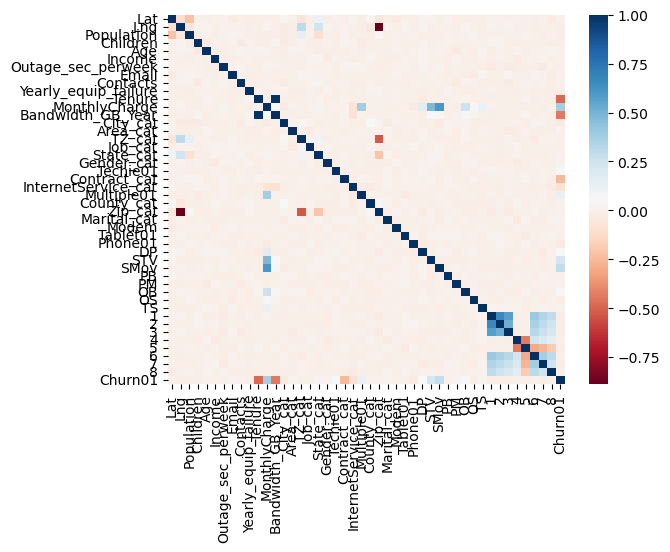

In [12]:
#ensure all columns show
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# calculate the correlation matrix
corr = churn.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [13]:
#Picking my independent variables based on correlation with customer charge
#Question: what factors cause customer churn?
#Chosing variables with correlation greater than .1 and less than -.1
#SMov, STV, Multiple01, Bandwidth_GB_Year, Tenure, MonthlyCharge, Contract_cat

churn.drop(['Lat', 'Lng','Population', 'Children', 'Age', 'Income', 'Email', 'Contacts', 'Yearly_equip_failure', 'City_cat',
            'State_cat','Area_cat','TZ_cat', 'Job_cat', 'Gender_cat', 'County_cat', 'Zip_cat', 'Techie01', 
            'Outage_sec_perweek', 'InternetService_cat', 'Phone01', 'DP', 'OB','OS','TS',
            'Marital_cat', 'Modem', 'Tablet01','PB','PM', '1', '2','3', '4','5','6','7','8'],axis=1, inplace=True)

In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tenure             10000 non-null  float64
 1   MonthlyCharge      10000 non-null  float64
 2   Bandwidth_GB_Year  10000 non-null  float64
 3   Contract_cat       10000 non-null  int8   
 4   Multiple01         10000 non-null  int8   
 5   STV                10000 non-null  int8   
 6   SMov               10000 non-null  int8   
 7   Churn01            10000 non-null  int8   
dtypes: float64(3), int8(5)
memory usage: 283.3 KB


In [44]:
from statsmodels.formula.api import logit

model=logit("Churn01 ~ Tenure + MonthlyCharge + Bandwidth_GB_Year + Contract_cat + Multiple01 + STV + SMov", data = churn).fit()

Optimization terminated successfully.
         Current function value: 0.243369
         Iterations 8


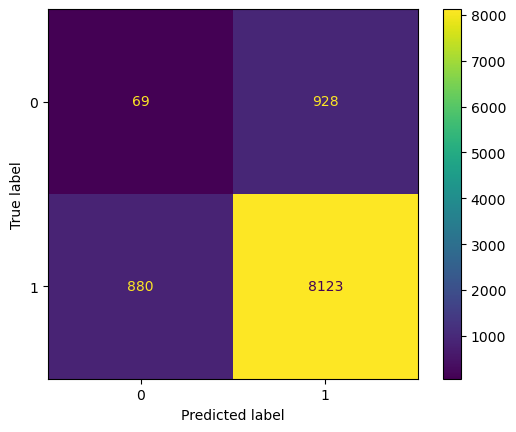

In [45]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 10000)
predicted = numpy.random.binomial(1,.9,size = 10000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])

cm_display.plot()
plt.show()

In [46]:
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy)

0.8192


In [22]:
print(model.params)

Intercept           -3.971613
Tenure              -0.322785
MonthlyCharge        0.014037
Bandwidth_GB_Year    0.002695
Contract_cat        -1.833368
Multiple01           0.835048
STV                  1.428910
SMov                 1.818842
dtype: float64


In [23]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                Churn01   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Fri, 06 Oct 2023   Pseudo R-squ.:                  0.5791
Time:                        12:11:51   Log-Likelihood:                -2433.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.9716      0.218    -18.223      0.000      -4.399      -3.544
Tenure               -0.3228      0.014    -22.597      0.000      -0.351      -0.295
MonthlyCharge         0.

In [24]:
model1=logit("Churn01 ~ Tenure + MonthlyCharge + Bandwidth_GB_Year + Contract_cat+ STV + SMov", data = churn).fit()

Optimization terminated successfully.
         Current function value: 0.247454
         Iterations 8


In [25]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:                Churn01   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Fri, 06 Oct 2023   Pseudo R-squ.:                  0.5720
Time:                        12:11:51   Log-Likelihood:                -2474.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.7265      0.203    -23.260      0.000      -5.125      -4.328
Tenure               -0.3314      0.014    -23.406      0.000      -0.359      -0.304
MonthlyCharge         0.

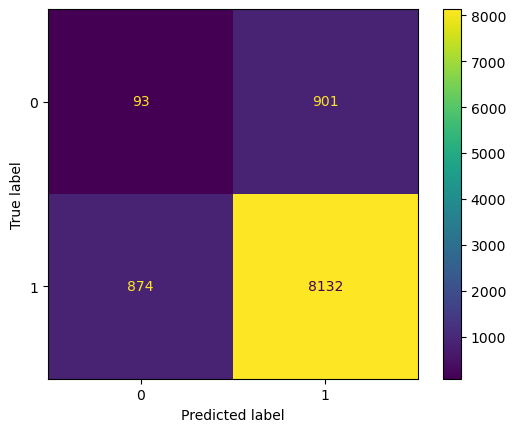

In [26]:
actual = numpy.random.binomial(1,.9,size = 10000)
predicted = numpy.random.binomial(1,.9,size = 10000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])

cm_display.plot()
plt.show()

In [27]:
Accuracy1 = metrics.accuracy_score(actual, predicted)
print(Accuracy1)

0.8225


In [28]:
model2=logit("Churn01 ~ Tenure + MonthlyCharge + Bandwidth_GB_Year + Contract_cat+ STV", data = churn).fit()

Optimization terminated successfully.
         Current function value: 0.254909
         Iterations 8


In [29]:
print(model2.summary())

                           Logit Regression Results                           
Dep. Variable:                Churn01   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Fri, 06 Oct 2023   Pseudo R-squ.:                  0.5591
Time:                        12:11:51   Log-Likelihood:                -2549.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.7846      0.187    -30.938      0.000      -6.151      -5.418
Tenure               -0.3544      0.014    -25.564      0.000      -0.382      -0.327
MonthlyCharge         0.

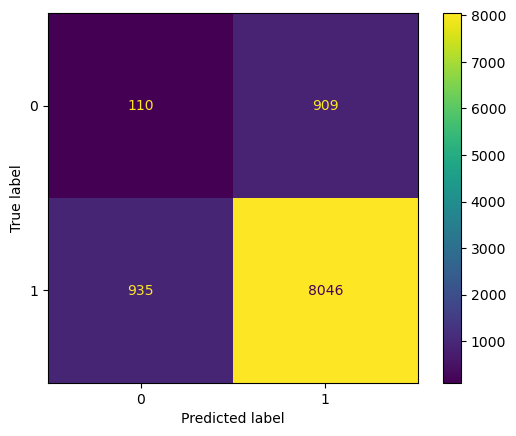

In [30]:
actual = numpy.random.binomial(1,.9,size = 10000)
predicted = numpy.random.binomial(1,.9,size = 10000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])

cm_display.plot()
plt.show()

In [31]:
Accuracy2 = metrics.accuracy_score(actual, predicted)
print(Accuracy2)

0.8156


In [32]:
model3=logit("Churn01 ~ Tenure + MonthlyCharge + Bandwidth_GB_Year + Contract_cat", data = churn).fit()

Optimization terminated successfully.
         Current function value: 0.255930
         Iterations 8


In [33]:
print(model3.summary())

                           Logit Regression Results                           
Dep. Variable:                Churn01   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Fri, 06 Oct 2023   Pseudo R-squ.:                  0.5574
Time:                        12:11:51   Log-Likelihood:                -2559.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.9470      0.184    -32.311      0.000      -6.308      -5.586
Tenure               -0.3640      0.014    -26.566      0.000      -0.391      -0.337
MonthlyCharge         0.

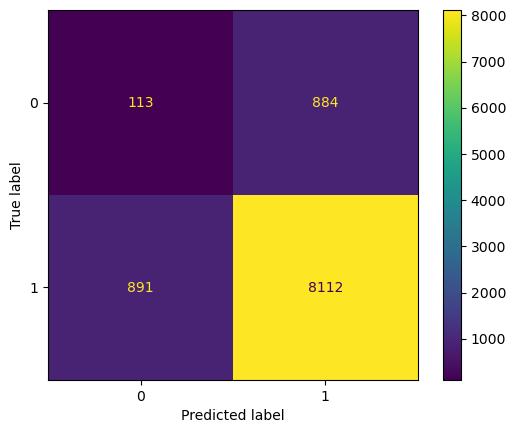

In [47]:
actual = numpy.random.binomial(1,.9,size = 10000)
predicted = numpy.random.binomial(1,.9,size = 10000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])

cm_display.plot()
plt.show()

In [48]:
Accuracy3 = metrics.accuracy_score(actual, predicted)
print(Accuracy3)

0.8225


# The accuracy went down, so model 2 is the best model

In [36]:
model4=logit("Churn01 ~ Tenure + MonthlyCharge + Bandwidth_GB_Year", data = churn).fit()

Optimization terminated successfully.
         Current function value: 0.324272
         Iterations 8


In [37]:
print(model4.summary())

                           Logit Regression Results                           
Dep. Variable:                Churn01   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 06 Oct 2023   Pseudo R-squ.:                  0.4392
Time:                        12:11:52   Log-Likelihood:                -3242.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.4427      0.157    -34.567      0.000      -5.751      -5.134
Tenure               -0.2721      0.011    -24.190      0.000      -0.294      -0.250
MonthlyCharge         0.

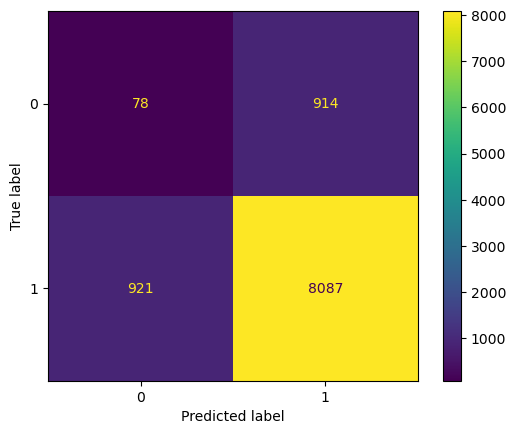

In [38]:
actual = numpy.random.binomial(1,.9,size = 10000)
predicted = numpy.random.binomial(1,.9,size = 10000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])

cm_display.plot()
plt.show()

In [39]:
Accuracy4 = metrics.accuracy_score(actual, predicted)
print(Accuracy4)

0.8165


In [40]:
model5=logit("Churn01 ~ Tenure + MonthlyCharge", data = churn).fit()

Optimization terminated successfully.
         Current function value: 0.342087
         Iterations 8


print(model5.summary())

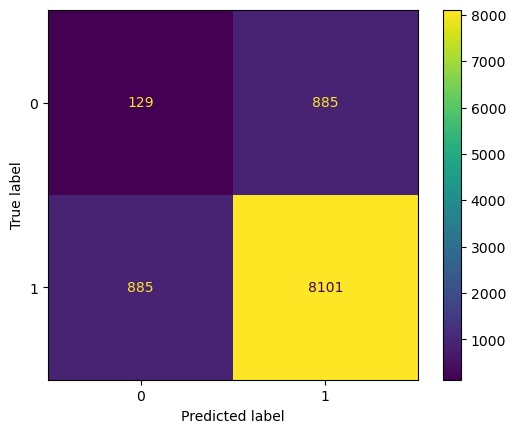

In [49]:
actual = numpy.random.binomial(1,.9,size = 10000)
predicted = numpy.random.binomial(1,.9,size = 10000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])

cm_display.plot()
plt.show()

In [51]:
Accuracy5 = metrics.accuracy_score(actual, predicted)
print(Accuracy5)

0.823
